In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, BisectingKMeans
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [11]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=4):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=4):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [12]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [13]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids


    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # If a cluster is empty, keep its centroid unchanged
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, self.labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return self


    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

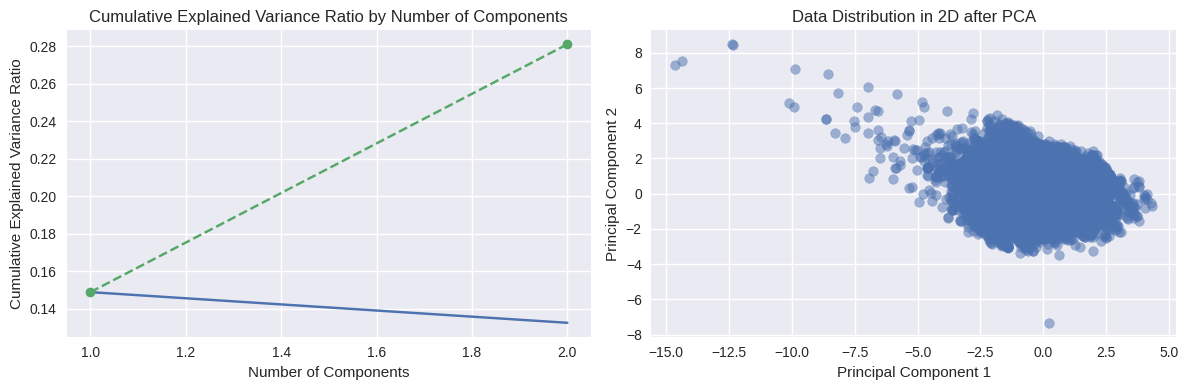

Shape after PCA: (45211, 2)


In [14]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Explained variance
    plt.subplot(1, 2, 1)
    plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Number of Components')

    # Cumulative explained variance
    plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio by Number of Components')
    plt.grid(True)


    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data Distribution in 2D after PCA')

    plt.tight_layout()
    plt.show()


    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

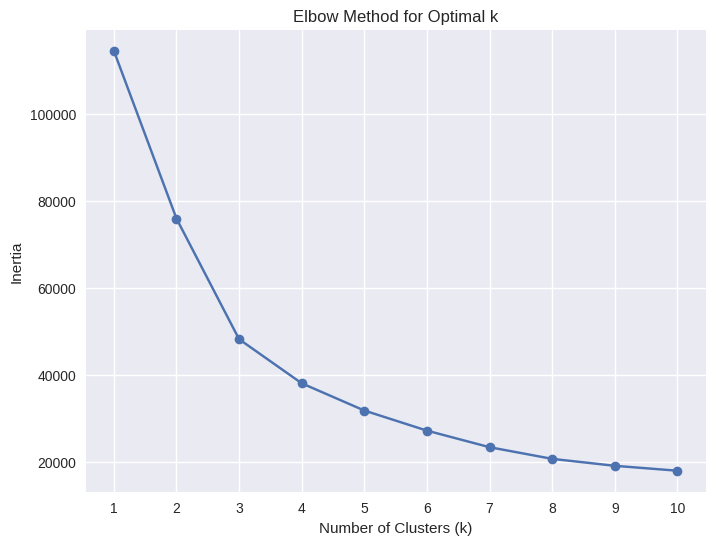

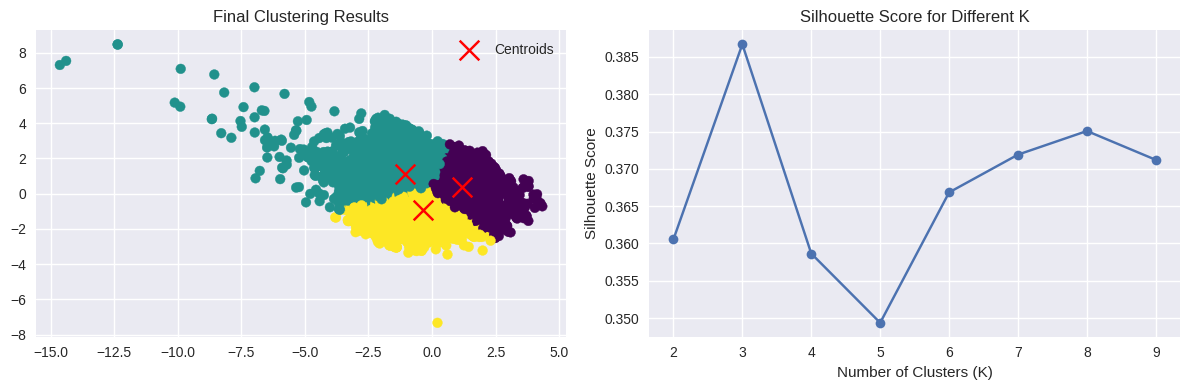


Clustering Evaluation for k=3:
Inertia: 48179.64
Silhouette Score: 0.39


In [19]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1)**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(calculate_inertia(X, kmeans.labels, kmeans.centroids))


    # Create elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(K)
    plt.grid(True)
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot silhouette scores for different k
silhouette_scores = []
K_range = range(2, 10) # Silhouette score is not defined for k=1
for k in K_range:
    kmeans_eval = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_eval = kmeans_eval.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels_eval)
    silhouette_scores.append(silhouette_avg)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics for the chosen k
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation for k=3:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

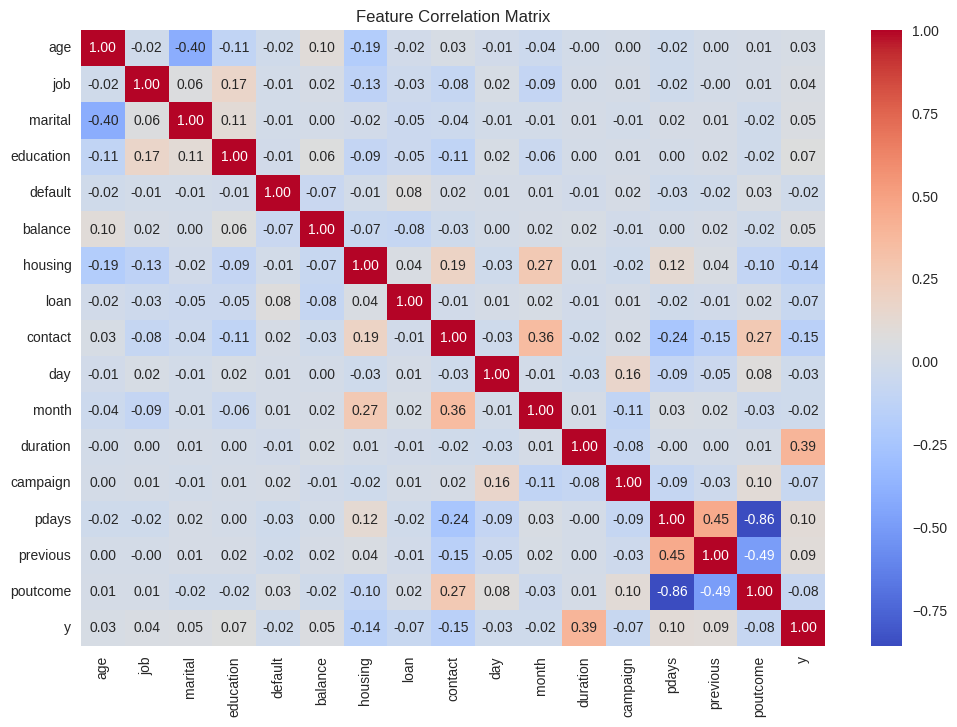

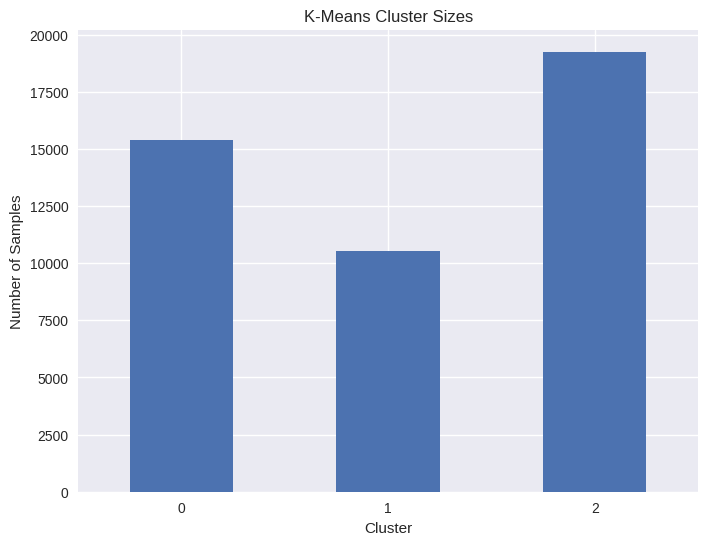

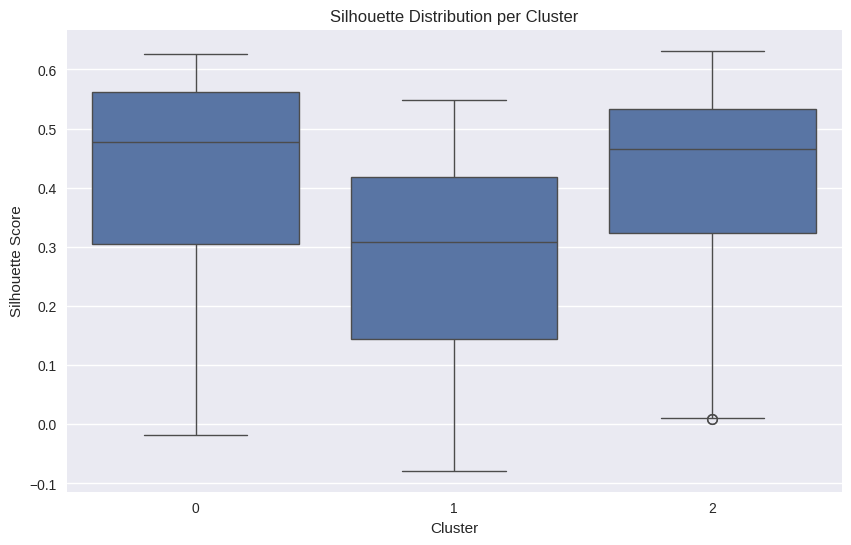

In [20]:
# 1. Feature Correlation matrix for the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# 2. Explained variance by Component’ and ‘Data Distribution in PCA Space’ after Dimensionality Reduction with PCA
# This is already handled in the apply_pca function, so no additional code is needed here.

# 3. ‘Inertia Plot’ and ‘Silhoutte Score Plot’ for K-means
# Inertia plot is already handled in the plot_elbow_curve function.
# Silhouette Score plot is already handled in the evaluation metrics section.

# 4. K-means Clustering Results with Centroids Visible (ScatterPlot)
# This is already handled in the visualization section after applying KMeans.

# K-means Cluster Sizes (Bar Plot)
kmeans_cluster_sizes = pd.Series(kmeans.labels).value_counts().sort_index()
plt.figure(figsize=(8, 6))
kmeans_cluster_sizes.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('K-Means Cluster Sizes')
plt.xticks(rotation=0)
plt.show()

# Silhouette distribution per cluster for K-means (Box Plot)
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)

silhouette_df = pd.DataFrame({'silhouette_score': silhouette_vals, 'cluster': kmeans.labels})

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='silhouette_score', data=silhouette_df)
plt.title('Silhouette Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [16]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        # Start with all points in one cluster (label 0)
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        current_cluster_id = 0
        num_clusters = 1

        while num_clusters < self.n_clusters:
            # Find the largest cluster by size
            cluster_sizes = np.bincount(self.labels_)
            largest_cluster_id = np.argmax(cluster_sizes)
            points_in_largest_cluster = X[self.labels_ == largest_cluster_id]

            if len(points_in_largest_cluster) < 2:
                 # Cannot split a cluster with less than 2 points
                 break

            # Perform binary KMeans on the largest cluster
            kmeans_split = KMeans(n_clusters=2, random_state=self.random_state, n_init=10) # Set n_init explicitly
            split_labels = kmeans_split.fit_predict(points_in_largest_cluster)

            # Assign new labels
            new_label_1 = largest_cluster_id
            new_label_2 = num_clusters

            # Update labels in the original labels array
            self.labels_[self.labels_ == largest_cluster_id] = np.where(split_labels == 0, new_label_1, new_label_2)

            # Optional: Store split information and centroids
            self.split_tree[largest_cluster_id] = (new_label_1, new_label_2)
            self.centers_[new_label_1] = kmeans_split.cluster_centers_[0]
            self.centers_[new_label_2] = kmeans_split.cluster_centers_[1]


            num_clusters += 1

        return self.labels_

# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)


 Bisecting K-Means Evaluation:
Inertia: 55200.73
Silhouette Score: 0.34


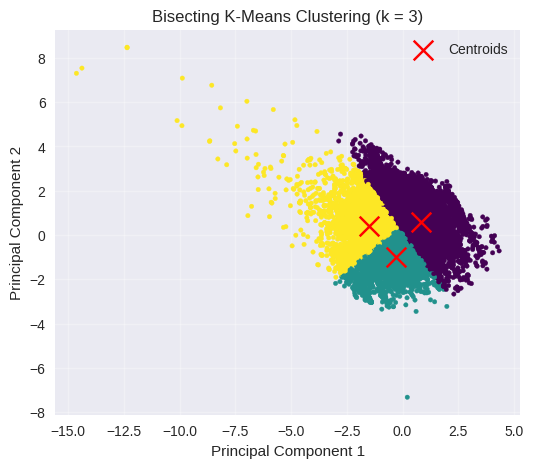

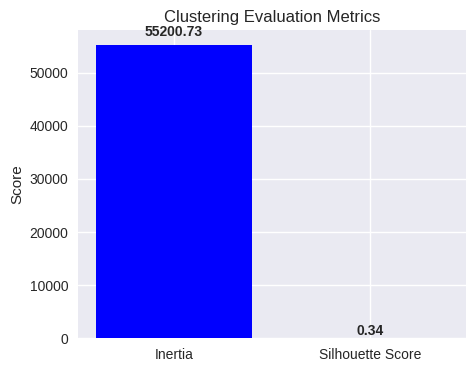

/tmp/ipython-input-959019012.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=sil_samples, palette='viridis')


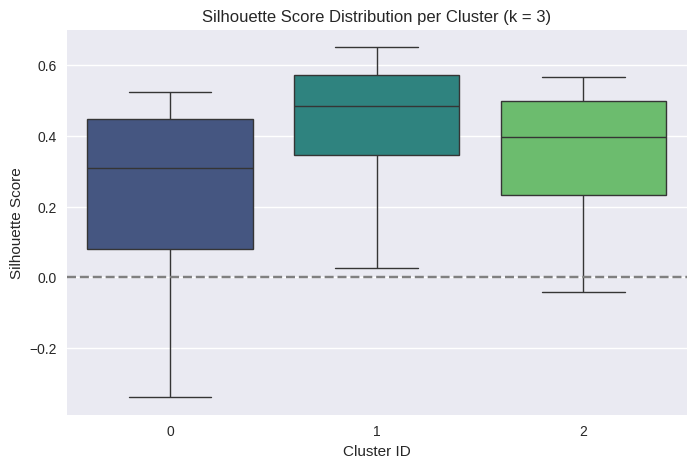

In [22]:
bisect = BisectingKMeans(n_clusters=3, random_state=42)
labels = bisect.fit_predict(X_pca)
centroids = np.array([bisect.centers_[k] for k in sorted(bisect.centers_.keys())])

def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2)
    return inertia
inertia = calculate_inertia(X_pca, labels, centroids)

unique_labels = np.unique(labels)
if len(unique_labels) > 1:
    silhouette = silhouette_score(X_pca, labels)
else:
    silhouette = np.nan

print("\n Bisecting K-Means Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}" if not np.isnan(silhouette) else "Silhouette Score: N/A")

# Clustering results
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title(f"Bisecting K-Means Clustering (k = 3)")
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

# Bar chart
plt.figure(figsize=(5, 4))
plt.bar(['Inertia', 'Silhouette Score'], [inertia, silhouette if not np.isnan(silhouette) else 0], color=['blue', 'green'])
plt.title("Clustering Evaluation Metrics")
plt.ylabel("Score")

# Add value labels
for i, v in enumerate([inertia, silhouette if not np.isnan(silhouette) else 0]):
    plt.text(i, v + (0.02 * v if v != 0 else 0.1), f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()

# Silhoutte
if len(unique_labels) > 1:
    sil_samples = silhouette_samples(X_pca, labels)
    sil_df = []
    for i in range(len(unique_labels)):
        sil_df.append(sil_samples[labels == i])
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=labels, y=sil_samples, palette='viridis')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Silhouette Score Distribution per Cluster (k = 3)")
    plt.xlabel("Cluster ID")
    plt.ylabel("Silhouette Score")
    plt.show()

In [17]:
bisect = BisectingKMeans(n_clusters=3)
bisect_labels = bisect.fit_predict(X_pca)

# K-Means
kmeans_cluster_sizes = pd.Series(kmeans.labels).value_counts().sort_index()
print("K-Means Cluster Sizes:")
print(kmeans_cluster_sizes)

# Bisecting K-Means
bisect_cluster_sizes = pd.Series(bisect_labels).value_counts().sort_index()
print("\nBisecting K-Means Cluster Sizes:")
print(bisect_cluster_sizes)

K-Means Cluster Sizes:
0    15411
1    10541
2    19259
Name: count, dtype: int64

Bisecting K-Means Cluster Sizes:
0    20434
1    16348
2     8429
Name: count, dtype: int64


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!